In [155]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

# Importing data with Pandas, and transforming it into numpy arrays.

1. First you import the data with pandas, and show it.

2. Then you assign the data that is going to y_train, and x_train with pd.get_dummies function and the name of the columns.

3. After that you just replace y_train and x_train data, with numerical values with .values property.

4. I wanted to delete the fifth column of x_train, so I used np.delete()

In [156]:
data = pd.read_csv('train_Titanic.csv')
data.head()
y_train = data["Survived"]
features = ["Pclass","Age", "SibSp", "Parch","Sex"]
x_train = pd.get_dummies(data[features])
print(y_train.shape)
print(x_train.shape)
print(y_train, '\n', x_train)
y_train = y_train.values
x_train = x_train.values
x_train = np.delete(x_train, 4, axis=1)
print(x_train, x_train.shape)
print(y_train, y_train.shape)

(891,)
(891, 6)
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64 
      Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         3  22.0      1      0           0         1
1         1  38.0      1      0           1         0
2         3  26.0      0      0           1         0
3         1  35.0      1      0           1         0
4         3  35.0      0      0           0         1
..      ...   ...    ...    ...         ...       ...
886       2  27.0      0      0           0         1
887       1  19.0      0      0           1         0
888       3   0.5      1      2           1         0
889       1  26.0      0      0           0         1
890       3  32.0      0      0           0         1

[891 rows x 6 columns]
[[ 3.  22.   1.   0.   1. ]
 [ 1.  38.   1.   0.   0. ]
 [ 3.  26.   0.   0.   0. ]
 ...
 [ 3.   0.5  1.   2.   0. ]
 [ 1.  26.   0.   0.   1. ]
 [ 3.  32.   0.   0.   1

In [157]:
def sigmoid(z):
    g = 1 / (1+np.exp(-z))
    return g

In [158]:
def compute_cost(x,y,w,b):
    m, n = x.shape[:]
    total_cost = 0.
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    total_cost = np.sum(np.dot(-y, np.log(f_wb))) - np.sum(np.dot((1 - y),  np.log(1-f_wb) ))
   # for i in range(m):
       # z_i = np.sum(np.dot(x[i], w) + b)
      #  f_wb_i = sigmoid(z_i)
       # total_cost += -y[i] * np.log(f_wb_i) - ((1-y[i]) * np.log(1 - f_wb_i))
    return total_cost / (2*m)

In [159]:
w = np.zeros_like(x_train[0])
b = 0.

cost = compute_cost(x_train, y_train, w, b)
print(cost)

0.3465735902799726


In [160]:
def compute_gradient(x,y,w,b):
    m, n = x.shape[:]
    dj_db = 0.
    dj_dw = np.zeros((n,))
    z = np.dot(x, w) + b
    f_wb = sigmoid(z)
    dj_db = np.sum(f_wb - y)
    dj_dw = np.dot(x.T,(f_wb - y))
    #for i in range(m):
    #    z_i = np.dot(x[i], w) + b
    #    f_wb_i = sigmoid(z_i)
    #    dj_db += f_wb_i - y[i]
    #    dj_dw += np.dot(x[i], (f_wb_i - y[i]))
    dj_db /= m
    dj_dw /= m
    return dj_db, dj_dw

In [161]:
dj_db, dj_dw = compute_gradient(x_train, y_train, w, b)
print(dj_db,'\n', dj_dw)
x=0.

0.11616161616161616 
 [0.40572391 2.69491021 0.07968575 0.01234568 0.20145903]


In [162]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    m, n = x.shape[:]
    for i in range(num_iters):
        dj_db, dj_dw = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i<100000:
            J_history.append( compute_cost(x,y,w,b) )
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0 or i == num_iters-1:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history

In [163]:
alpha = 0.014
num_iters = 200000
w_out, b_out, J_hist = gradient_descent(x_train, y_train, w, b, alpha, num_iters)
print(w_out, b_out)

Iteration    0: Cost 0.3662591444513652   
Iteration 20000: Cost 0.22702089974671885   
Iteration 40000: Cost 0.22660608787415856   
Iteration 60000: Cost 0.2265949466926677   
Iteration 80000: Cost 0.2265946178147785   
Iteration 100000: Cost 0.22659460795291037   
Iteration 120000: Cost 0.22659460795291037   
Iteration 140000: Cost 0.22659460795291037   
Iteration 160000: Cost 0.22659460795291037   
Iteration 180000: Cost 0.22659460795291037   
Iteration 199999: Cost 0.22659460795291037   
[-1.08746966 -0.01823324 -0.27662645 -0.02341383 -2.75080236] 4.231233006858214


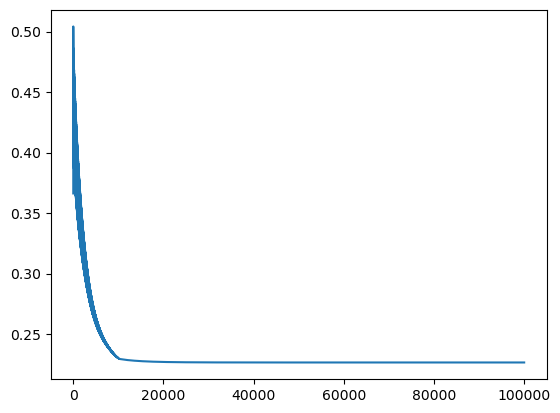

In [164]:
plt.plot(J_hist)
plt.show()

In [128]:
# Now I have to make predicitions based on my parameters with the test data i have from the titanic kaggle dataset, 
#and then submit it in kaggle and, I also can see the accuracy of my model by comparing if p == y . 


In [165]:
test_data = pd.read_csv('test_Titanic.csv')
test_data.head()
x_test = pd.get_dummies(test_data[features])
print(x_test)
x_test = x_test.values
x_test = np.delete(x_test, 4, axis=1)
print(x_test, x_test.shape)

     Pclass   Age  SibSp  Parch  Sex_female  Sex_male
0         3  34.5      0      0           0         1
1         3  47.0      1      0           1         0
2         2  62.0      0      0           0         1
3         3  27.0      0      0           0         1
4         3  22.0      1      1           1         0
..      ...   ...    ...    ...         ...       ...
413       3   0.5      0      0           0         1
414       1  39.0      0      0           1         0
415       3  38.5      0      0           0         1
416       3   0.5      0      0           0         1
417       3   0.5      1      1           0         1

[418 rows x 6 columns]
[[ 3.  34.5  0.   0.   1. ]
 [ 3.  47.   1.   0.   0. ]
 [ 2.  62.   0.   0.   1. ]
 ...
 [ 3.  38.5  0.   0.   1. ]
 [ 3.   0.5  0.   0.   1. ]
 [ 3.   0.5  1.   1.   1. ]] (418, 5)


In [166]:
def predict(x,w,b):
    m,n = x.shape[:]
    p = np.zeros(m)
    z = np.dot(x,w) + b
    f_wb = sigmoid(z)
    p = (f_wb >= 0.5).astype(int)
    #for i in range(m):
        #p[i] = f_wb[i] >= 0.5
    return p   

In [167]:
predictions = predict(x_test, w_out, b_out)
predictions = predictions.reshape(-1,1)
print(predictions[:20])
print(predictions.shape)

[[0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]]
(418, 1)


In [168]:
#Comparing the predictions of the training set with the actual values gives you the accuracy.
p = predict(x_train, w_out, b_out)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))
#I think the accuracy could be better, but at the moment I don't know how to improve it...

Train Accuracy: 79.124579


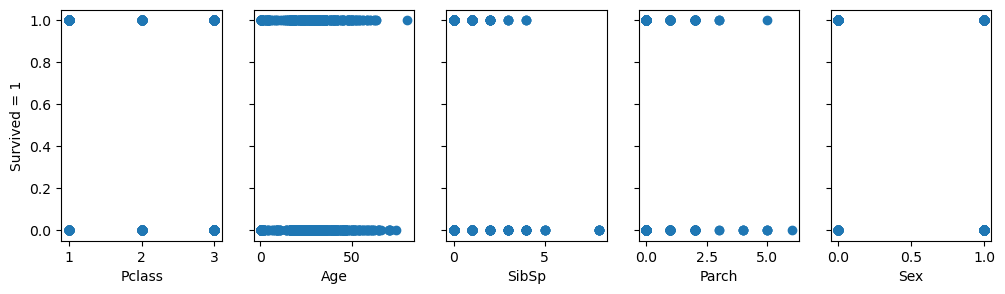

In [169]:
#Plotting each feature relative with y.
fig,ax=plt.subplots(1, 5, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(features[i])
ax[0].set_ylabel("Survived = 1")
plt.show()